# State Space Example
Using a discrete time model with scalars for input/output and state rather than matrices.
### variables:
  1. State variable: x
  2. Observed variable: y
  3. Input/Control variable: u
  4.  Disturbance: w
  5. Coefficient matrices (here scalars) A, B, C
  
  $$\displaystyle\dot{x}(t) = A(t)x(t)+B(t)u(t)$$
  $$\displaystyle y(t) = C(t)x(t)+D(t)u(t)$$
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import os

seed = 1000
np.random.seed(seed)

In [2]:
# Parameters and class initialization for Environment.
class Environment:
  def __init__(self, A, B, C, x_0 = 10):
    self.x_0 = x_0
    self.x_t = x_0 
    self.A = A
    self.B = B
    self.C = C

  def reset(self):
    # reset all the state variables
    self.x_t = self.x_0
    return self.x_t
  
  def step(self, u_t):
    # update state variable x_t -> x_{t+1} for discrete t
    self.x_t = self.A*self.x_t + self.B*u_t
    y_t = self.C*self.x_t
    return self.x_t, y_t
  


In [3]:
# Step iteratively and save data in a list of tuples
CSV_PATH = "./Sim_data.csv"

def run_simulation(A=1., B=1., sigma=1., steps=10):
    # Instantiate environment and update x_t iteratively
    env = Environment(A, B, C = 1., x_0 = 10)
    sim_data = np.zeros((steps+1, 3)) # data = (x_all, u, y)
    sim_data[0] = env.x_t, 0, 0 # initialize data with (x_all, u, y) = (x_0, 0, 0)
    
    for i in range(steps):
      u = np.random.normal(0, sigma)
      x_new, y = env.step(u)

      sim_data[i+1] = (x_new, u, y)

    #save data to "Sim_data.csv" on local directory
    sim_data_df = pd.DataFrame(sim_data, columns=["x", "u", "y"])
    sim_data_df.to_csv(CSV_PATH)

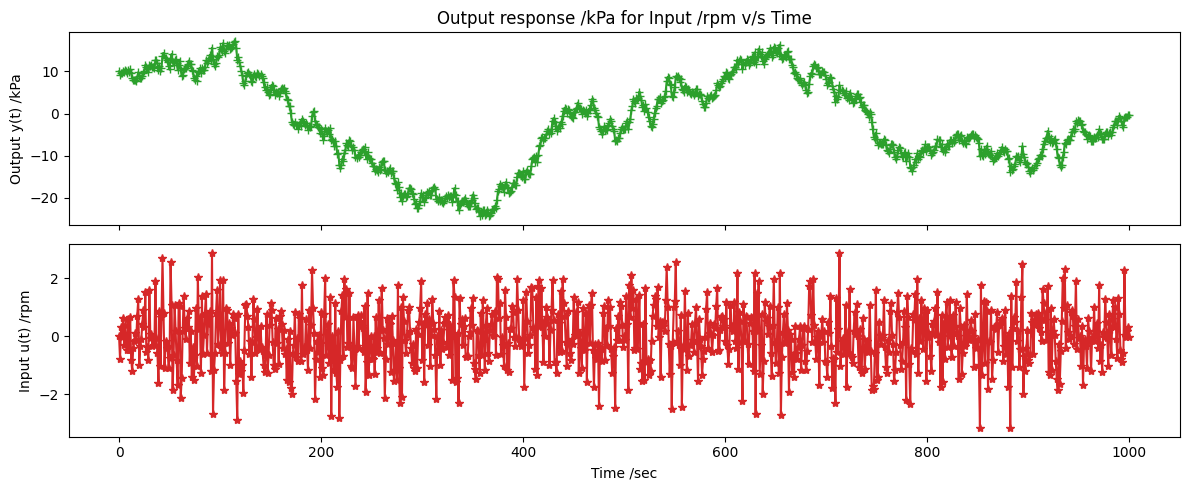

In [4]:

if __name__ == "__main__":
  CSV_PATH = "./Sim_data.csv"
  steps = 1000

  plt_colors = mcolors.TABLEAU_COLORS

  #save simulation data to csv
  run_simulation(steps=steps, sigma = 1, A=1)

  sim_data = pd.read_csv(CSV_PATH)

  # incrementing steps for consistent dimensions
  time_stamp = np.array(range(steps+1))
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 5), sharex='all')

  # Plot input u(t) and state variable x(t) v/s time
  ax1.plot(sim_data.x,  plt_colors['tab:green'], marker="+")
  ax2.plot(sim_data.u,  plt_colors['tab:red'], marker="*")


  ax1.set(ylabel="Output y(t) /kPa", title="Output response /kPa for Input /rpm v/s Time")

  ax2.set(ylabel="Input u(t) /rpm", xlabel="Time /sec")

  
plt.tight_layout()


In [ ]:
''' Compare this Fig and the previous one please (oguzhan)'''
run_simulation(steps=steps, sigma = 1, A=1)

sim_data = pd.read_csv(CSV_PATH)
time_stamp = np.array(range(steps+1)) #changed length
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 5), sharex='all') # reduced figsize for the notebook, added sharex

# Plot input u(t) and state variable x(t) vs. time
ax1.plot(time_stamp[:], sim_data.x,  plt_colors['tab:green'], marker="+") 

ax2.plot(time_stamp[:], sim_data.u,  plt_colors['tab:red'], marker="*")
#changed the order of x and u. top: x (effect), bottom: u (cause)

ax1.set(ylabel="x(t) / kPa ", title="System Response") # changed title
# ax1.legend(['x(t) / kPa']) #added an arbitrary unit, removed legend (since it is redundant)

ax2.set(ylabel="u(t) / rpm", xlabel="Time / s ") # removed title, edited ylabel, edited xlabel
# ax2.legend(["u(t) / rpm"]) # edited legend, added an arbitrary unit, removed legend (since it is redundant)
plt.tight_layout()  # for cosmetic purposes